In [1]:
import importlib
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

In [2]:
data = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/trefhtptile_composites/3cities/trefhtptilecomposites_3cities.nc")


In [3]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [4]:
def plotcomposite(data, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot([0,10],[0,0], color='black')
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    ax.set_xticks(list(np.arange(0,10,1)+0.5))
    ax.set_xlim(0,10)
    ax.set_xticklabels(['1-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-99'], rotation=60, ha="right", rotation_mode="anchor")
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlabel('CLM5 percentile bin', fontsize=14)
    ax.set_ylabel(ylabelstr, fontsize=14)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

def plotcomposite_noxlabel(data, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot([0,10],[0,0], color='black')
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    ax.set_xticks(list(np.arange(0,10,1)+0.5))
    ax.set_xlim(0,10)
    ax.set_xticklabels([' ',' ',' ',' ',' ',' ',' ',' ',' ',' '], rotation=60, ha="right", rotation_mode="anchor")
    ax.set_title(titlestr, fontsize=16)
    ax.set_xlabel(' ', fontsize=14)
    ax.set_ylabel(ylabelstr, fontsize=14)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

def oplotcomposite(ax, data, color="darkblue"):
    ax.plot(np.arange(0,10,1)+0.5, data, color=color, linewidth=2)
    ax.plot(np.arange(0,10,1)+0.5, data, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    return ax

def plotcomposite_lev(data, lev, titlestr, ylabelstr, x1, x2, y1, y2, color="darkred", yticks=None, yticknames=None, yrange=None):
    ax = fig.add_axes(np.array([x1, y1, (x2-x1), (y2-y1)]))
    ax.plot(data, -1.*lev, color=color, linewidth=2)
    ax.plot(data, -1.*lev, "o", markerfacecolor=color, markeredgecolor="black", markersize=10, markeredgewidth=2)
    
    if (yticks):
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticknames, fontsize=14)
    
    if (yrange):
        ax.set_ylim(yrange[0],yrange[1])
    return ax

In [5]:
net_clm5 = -1.*data.fsns_clm5 + data.flns_clm5 + data.shflx_clm5 + data.lhflx_clm5
net_snowd = -1.*data.fsns_snowd + data.flns_snowd + data.shflx_snowd + data.lhflx_snowd

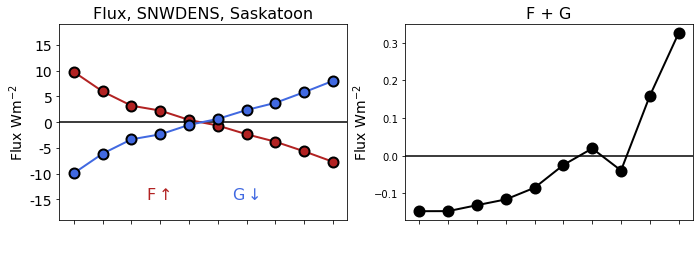

In [10]:
fig = plt.figure(figsize=(16,16))

ax4 = plotcomposite_noxlabel(net_snowd[:,0],'Flux, SNWDENS, Saskatoon','Flux Wm$^{-2}$', 0.37,0.62,0.8,0.97,color='firebrick',
                            yrange=[-19,19], yticks=[-15,-10,-5,0,5,10,15],yticknames=['-15','-10','-5','0','5','10','15'])
ax4 = oplotcomposite(ax4, data.fgr_snowd[:,0], color='royalblue')
ax4.text(3,-15,'F$\\uparrow$',color='firebrick', fontsize=16)
ax4.text(6,-15,'G$\downarrow$', color='royalblue', fontsize=16)

ax4 = plotcomposite_noxlabel(net_snowd[:,0] + data.fgr_snowd[:,0],'F + G','Flux Wm$^{-2}$', 0.67,0.92,0.8,0.97,color='black')
